In [ ]:
%%capture
'''
(C) Copyright 2020-2025 Murilo Marques Marinho (murilomarinho@ieee.org)

     This file is licensed in the terms of the
     Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)
     license.

 Derivative work of:
 https://github.com/dqrobotics/learning-dqrobotics-in-matlab/tree/master/robotic_manipulators
 Contributors to this file:
     Murilo Marques Marinho (murilomarinho@ieee.org)
'''

<a name="T_D05B1C6B"></a>
# <span style="color:rgb(213,80,0)">Quaternion Basics using DQ Robotics</span>
<a name="beginToc"></a>
## Table of Contents
[Quaternion Basics using DQ Robotics](#T_D05B1C6B)

&emsp;[Introduction](#H_CE335F4C)

&emsp;[Quick review on complex numbers](#H_7DF2A060)

&emsp;&emsp;&emsp;[Sum/Subtraction](#H_03DC8E14)

&emsp;&emsp;&emsp;[Product](#H_42FA8EEB)

&emsp;&emsp;&emsp;[Norm](#H_EFB74034)

&emsp;&emsp;&emsp;[Real](#H_79B4805D)

&emsp;&emsp;[Operations on quaternions](#H_582FD121)

&emsp;&emsp;&emsp;[Sum/Subtraction](#H_02F5F344)

&emsp;&emsp;&emsp;[Real part](#H_94462E57)

&emsp;&emsp;&emsp;[Imaginary part](#H_8ACC88AF)

&emsp;&emsp;&emsp;[Conjugation](#H_2242E6F0)

&emsp;&emsp;&emsp;[Vec3](#H_E2D9BC8C)

&emsp;&emsp;&emsp;[Vec4](#H_75053EE9)

&emsp;&emsp;&emsp;[Hamilton Operators](#H_271E2BFF)

&emsp;&emsp;&emsp;[Conjugate mapping matrix](#H_BA5B2E63)

&emsp;[Unit quaternions and the rotation of rigid bodies](#H_CC4D2A23)

&emsp;&emsp;&emsp;[Unit quaternion double-cover property](#H_35D1DED6)

&emsp;&emsp;&emsp;[No rotation](#H_C67278B0)

&emsp;&emsp;&emsp;[Plotting quaternions](#H_FC487DD7)

&emsp;&emsp;&emsp;[Sequential rotations](#H_C909BC72)

&emsp;&emsp;&emsp;[Reverse rotation](#H_625A2B4B)

[Homework](#T_98D69E51)

[Bonus Homework](#T_B6A9D8F3)

<a name="endToc"></a>
<a name="H_CE335F4C"></a>
## Introduction

Before going into the topic of quaternions, it is important to review some high-school level math.

<a name="H_7DF2A060"></a>
## Quick review on complex numbers

The set of complex numbers $\mathbb{C}$ ,  can be understood as an extention of the set of real numbers $\mathbb{R}$ . Any complex number can always be written in the form


$$\mathit{\mathbf{c}}=a+b\hat{\;\imath \;,}$$

where $a,b\in \;$ $\mathbb{R}$ . In addition, the imaginary unit, $\hat{\;\imath \;}$ has the following property


$${\hat{\;\imath \;} }^2 =-1\ldotp$$

For instance, the complex number


$${\mathit{\mathbf{c}}}_1 =5+28\hat{\imath \;} \;$$

can be written using DQ Robotics as follows.


In [2]:
%% Include the namespace. Probably a good idea to add to all scripts.
include_namespace_dq

%% Define c1
c1 = 5 + 28*i_

c1 = 
         5 + 28i


Notice that the imaginary unit property holds:


In [3]:
%% Imaginary unit property
i_*i_

ans = 
          - 1


***Note: Do not confuse MATLAB's "i" with DQ Robotics "i_". They are different***


In [4]:
if i_ ~= i
    disp('DQ Robotics i_ is not equal to MATLAB i')
end

DQ Robotics i_ is not equal to MATLAB i

<a name="H_69A90DBD"></a>
### **Operations on complex numbers**

The operations on complex numbers are very similar to the operations on real numbers. We just need to respect the property ${\hat{\;\imath \;} }^2 =-1\ldotp$


For instance, for the complex numbers


$$c_1 =a_1 +b_1 \hat{\imath \;}$$

 $c_2 =a_2 +b_2 \hat{\imath \;}$ ,


In [5]:
c1 = 5  + 28*i_

c1 = 
         5 + 28i

In [6]:
c2 = 25 + 88*i_

c2 = 
         25 + 88i

<a name="H_03DC8E14"></a>
#### Sum/Subtraction

$$c_3 =c_1 +c_2 =\left(a_1 +a_2 \right)+\left(b_1 +b_2 \right)\hat{\;\imath \;} \ldotp$$

In [7]:
c3 = c1+c2

c3 = 
         30 + 116i


The subtraction is defined accordingly.


$${\;c}_1 -c_2 =\left(a_1 -a_2 \right)+\left(b_1 -b_2 \right)\hat{\;\imath \;} \ldotp$$

In [8]:
c1-c2

ans = 
          - 20 - 60i

<a name="H_42FA8EEB"></a>
#### Product

The product will be


$${\;c}_1 c_2 =\left(a_1 a_2 -b_1 b_2 \right)+\left(a_1 b_2 +b_1 a_2 \right)\hat{\;\imath \;}$$

In [9]:
c1*c2

ans = 
          - 2339 + 1140i

<a name="H_643BB6A0"></a>
#### **Conjugation**

The conjugate of a complex number is defined as


$${\left(c_1 \right)}^* =a-b\hat{\;\imath \;}$$

In [10]:
conj(c1)

ans = 
         5 - 28i

<a name="H_EFB74034"></a>
#### Norm

The norm of a complex number can be obtained as


$$\left|\right|c_1 \left|\right|=\sqrt{c_1 c_1^* \;}=\sqrt{\left(a_1 +b_1 \hat{\imath \;} \right)\left(a_1 -b_1 \hat{\imath \;} \right)\;}=\sqrt{a_1^2 +b_1^2 }$$

In [11]:
norm(c1)

ans = 
         28.4429

<a name="H_EF08C35C"></a>
#### **Imaginary part**

The imaginary part is


$$\textrm{Im}\left(c_1 \right)=b\hat{\;\imath \;}$$

In [12]:
Im(c1)

ans = 
         28i

<a name="H_79B4805D"></a>
#### Real

The real part is


$$\textrm{Re}\left(c_1 \right)=a$$

In [13]:
Re(c1)

ans = 
         5

<a name="H_F9DE6A6F"></a>
## **Quaternions**

When we extend the concept of complex numbers to four dimensions, we have what we call quaternions. They compose the set $\mathbb{H}$ and can always be written in the form


$$\mathit{\mathbf{h}}=a+b\hat{\;\imath \;} +c\hat{\;\jmath \;} +d\hat{\;k}$$

where $a,b,c,d\in \;$ $\mathbb{R}$ . In addition, the imaginary units $\hat{\;\imath \;}$ , $\hat{\;\jmath \;}$ , and $\hat{\;k\;}$ have the following properties


$${\hat{\;\imath \;} }^2 ={\hat{\;\jmath \;} }^2 ={\hat{\;k} }^2 =\hat{\;\imath \;} \hat{\;\jmath \;} \hat{\;k} =-1$$

Note that every complex number is a quaternion, but not every quaternion is a complex number ( $\mathbb{C}\subset \mathbb{H}$ ).


For instance, the quaternion


$${\mathit{\mathbf{c}}}_1 =5+28\hat{\imath \;} +85\hat{\;\jmath \;} +99\hat{\;k}$$

can be written using DQ Robotics as follows


In [14]:
%% Include the namespace. Probably a good idea to add to all scripts.
include_namespace_dq

%% Define c1
c1 = 5 + 28*i_ + 86*j_ + 99*k_

c1 = 
         5 + 28i + 86j + 99k


We can verify the properties of the imaginary units in DQ Robotics as follows


In [15]:
i_^2

ans = 
          - 1

In [16]:
j_^2

ans = 
          - 1

In [17]:
k_^2

ans = 
          - 1

In [18]:
i_*j_*k_

ans = 
          - 1


***Note: Do not confuse MATLAB's "i" and "j" with DQ Robotics "i_" and "j_". They are not equal.***


In [19]:
if i_ ~= i
    disp('DQ Robotics i_ is not equal to MATLAB i')
end

DQ Robotics i_ is not equal to MATLAB i

In [20]:
if j_ ~= j
    disp('DQ Robotics j_ is not equal to MATLAB j')
end

DQ Robotics j_ is not equal to MATLAB j

<a name="H_582FD121"></a>
### Operations on quaternions

Considering ${\mathit{\mathbf{h}}}_1 ,{\mathit{\mathbf{h}}}_2 \in \;$ $\mathbb{H}$ , for example


In [21]:
h1 = 5 + 28*i_ + 86*j_ + 99*k_

h1 = 
         5 + 28i + 86j + 99k

In [22]:
h2 = -2 + 25*k_

h2 = 
          - 2 + 25k

<a name="H_02F5F344"></a>
#### Sum/Subtraction

$${\mathit{\mathbf{h}}}_1 \pm {\mathit{\mathbf{h}}}_2 =\left(a_1 \pm a_2 \right)+\left(b_1 \pm b_2 \right)\hat{\;\imath \;} +\left(c_1 \pm c_2 \right)\hat{\;\jmath \;} +\left(d_1 \pm d_2 \right)\hat{\;k\;}$$

In [23]:
h1+h2

ans = 
         3 + 28i + 86j + 124k

In [24]:
h1-h2

ans = 
         7 + 28i + 86j + 74k

<a name="H_F3B0C065"></a>
#### **Multiplication**

$${\mathit{\mathbf{h}}}_1 {\mathit{\mathbf{h}}}_2 =\textrm{See}\;\textrm{Bonus}\;\textrm{Homework}\;1\ldotp$$

In [25]:
h1*h2

ans = 
          - 2485 + 2094i - 872j - 73k


Notice that the multiplication between quaternions is, ***in general***, NOT COMMUTATIVE.


$${\mathit{\mathbf{h}}}_1 {\mathit{\mathbf{h}}}_2 \not= {{\mathit{\mathbf{h}}}_2 \mathit{\mathbf{h}}}_1$$

In [26]:
h3 = h1*h2

h3 = 
          - 2485 + 2094i - 872j - 73k

In [27]:
h4 = h2*h1

h4 = 
          - 2485 - 2206i + 528j - 73k

In [28]:
if h3==h4
    disp('h1*h2 is equal to h2*h1')
else
    disp('h1*h2 is not equal to h2*h1')
end

h1*h2 is not equal to h2*h1


It can be communitative in some cases. For instance, consider the trivial case in which $h_1 =h_2$ .

<a name="H_94462E57"></a>
#### Real part

$$\textrm{Re}\left({\mathit{\mathbf{h}}}_1 \right)=a$$

In [29]:
Re(h1)

ans = 
         5


If the real part of a quaternion is zero, it is called a *pure quaternion*, and belongs to the set ${\mathbb{H}}_p$ .

<a name="H_8ACC88AF"></a>
#### Imaginary part

$$\textrm{Im}\left({\mathit{\mathbf{h}}}_1 \right)=b\hat{\;\imath \;} +c\hat{\;\jmath \;} +d\hat{\;k}$$

In [30]:
Im(h1)

ans = 
         28i + 86j + 99k

<a name="H_2242E6F0"></a>
#### Conjugation

$${\left({\mathit{\mathbf{h}}}_1 \right)}^* =\textrm{Re}\left({\mathit{\mathbf{h}}}_1 \right)-\textrm{Im}\left({\mathit{\mathbf{h}}}_1 \right)=a-b\hat{\;\imath \;} -c\hat{\;\jmath \;} -d\hat{\;k}$$

In [31]:
conj(h1)

ans = 
         5 - 28i - 86j - 99k


**Norm**


$$\left|\right|{\mathit{\mathbf{h}}}_1 \left|\right|=\sqrt{{\mathit{\mathbf{h}}}_1 {\mathit{\mathbf{h}}}_1^* \;}=\textrm{See}\;\textrm{Bonus}\;\textrm{Homework}\;2\ldotp$$

In [32]:
norm(h1)

ans = 
         134.1864

<a name="H_E2D9BC8C"></a>
#### Vec3

The imaginary part of the quaternion can be mapped to ${\mathbb{R}}^3$ as follows


$${\textrm{vec}}_3 \left({\mathit{\mathbf{h}}}_1 \right)=\left\lbrack \begin{array}{c} b\\ c\\ d \end{array}\right\rbrack$$

In [33]:
vec3(h1)

ans = 3x1    
    28
    86
    99

<a name="H_75053EE9"></a>
#### Vec4

Quaternions can be mapped to ${\mathbb{R}}^4$ as follows


$${\textrm{vec}}_4 \left({\mathit{\mathbf{h}}}_1 \right)=\left\lbrack \begin{array}{c} a\\ b\\ c\\ d \end{array}\right\rbrack$$

In [34]:
vec4(h1)

ans = 4x1    
     5
    28
    86
    99

<a name="H_271E2BFF"></a>
#### Hamilton Operators

The hamilton operators are useful to provide a form of commutativity in the quaternion multiplication.


$${\textrm{vec}}_4 \left({\mathit{\mathbf{h}}}_1 {\mathit{\mathbf{h}}}_2 \right)=\overset{+}{{\mathit{\mathbf{H}}}_4 } \left({\mathit{\mathbf{h}}}_1 \right){\textrm{vec}}_4 \left({\mathit{\mathbf{h}}}_2 \right)=\overset{-}{{\mathit{\mathbf{H}}}_4 } \left({\mathit{\mathbf{h}}}_2 \right){\textrm{vec}}_4 \left({\mathit{\mathbf{h}}}_1 \right)$$

In [35]:
vec4(h1*h2)

ans = 4x1    
       -2485
        2094
        -872
         -73

In [36]:
hamiplus4(h1)*vec4(h2)

ans = 4x1    
       -2485
        2094
        -872
         -73

In [37]:
haminus4(h2)*vec4(h1)

ans = 4x1    
       -2485
        2094
        -872
         -73

<a name="H_BA5B2E63"></a>
#### Conjugate mapping matrix

The following matrix is useful when the quaternion conjugate is used. For quaternions it is defined as,


$${\mathit{\mathbf{C}}}_4 =\left\lbrack \begin{array}{cccc} 1 & 0 & 0 & 0\\ 0 & -1 & 0 & 0\\ 0 & 0 & -1 & 0\\ 0 & 0 & 0 & -1 \end{array}\right\rbrack$$

and has the following property


$${\mathit{\mathbf{C}}}_4 {\textrm{vec}}_4 \left({\mathit{\mathbf{h}}}_1 \right)={\textrm{vec}}_4 \left({\mathit{\mathbf{h}}}_1^* \right)\ldotp$$
<a name="H_CC4D2A23"></a>
## Unit quaternions and the rotation of rigid bodies

Unit quaternions compose the set ${\mathbb{S}}^3$ , which represent rotations of the reference frame of rigid bodies in three dimensional space. A unit quaternion can always be written in the form


$$\mathit{\mathbf{r}}=\cos \left(\frac{\phi }{2}\right)+\textrm{vsin}\left(\frac{\;\phi \;}{2}\right)\left(\textrm{See}\;\textrm{Bonus}\;\textrm{Homework}\;3\right)$$

where $\phi \in$ $\mathbb{R}$ is the rotation angle around the rotation axis $v\in$ ${\mathbb{S}}^3 \cap {\mathbb{H}}_p$ (Remember that ${\mathbb{H}}_p$ are pure quaternions, that is, quaternions for which the real part is zero).


Unit-norm quaternions, as the name says, have unit norm


$$\left|\right|r\left|\right|=1\ldotp$$

For instance, to represent the rotation of $\frac{\pi }{2}$ rad about the x-axis, the following quaternion can be used


$$r_1 =\cos \left(\frac{\;\pi \;}{4}\right)+\hat{\;\imath \;} \sin \left(\frac{\;\pi \;}{4}\right)$$

In [38]:
r1 = cos(pi/4) + i_*sin(pi/4)

r1 = 
         0.70711 + 0.70711i


We can check that $r_1$ indeed has unit norm


In [39]:
norm(r1)

ans = 
         1

<a name="H_35D1DED6"></a>
#### Unit quaternion double-cover property

Note that the same rotation can be represented by two different quaternions, because


$${\mathit{\mathbf{r}}}_1$$

and


$$-{\mathit{\mathbf{r}}}_1$$

represent the same resulting rotation but are different quaternions. For instance, see that even though the following two quaternions represent the same rotation,


In [40]:
r1 = 1

r1 = 1

In [41]:
r2 = cos(pi) + i_*sin(pi)

r2 = 
          - 1


they have opposite signs.


This is called the "double-cover" property. We will not address this now, but it is important to know that this property exists.

<a name="H_C67278B0"></a>
#### No rotation

The quaternion that represents that there is no rotation is


$$r_1 =1$$

In [42]:
r1 = 1

r1 = 1

<a name="H_FC487DD7"></a>
#### Plotting quaternions

Using DQ Robotics, the rotation quaternions can be plotted on screen. See, for example


 *Note: for the unit quaternion* $r_1 =1$ *, you have to explicitly initialize it using the DQ constructor before plotting, otherwise MATLAB will not use the correct plot function.*


In [43]:
clear all;
include_namespace_dq
disp('Displaying 1 as a quaternion')

Displaying 1 as a quaternion

In [44]:
r1 = DQ(1)

r1 = 
         1


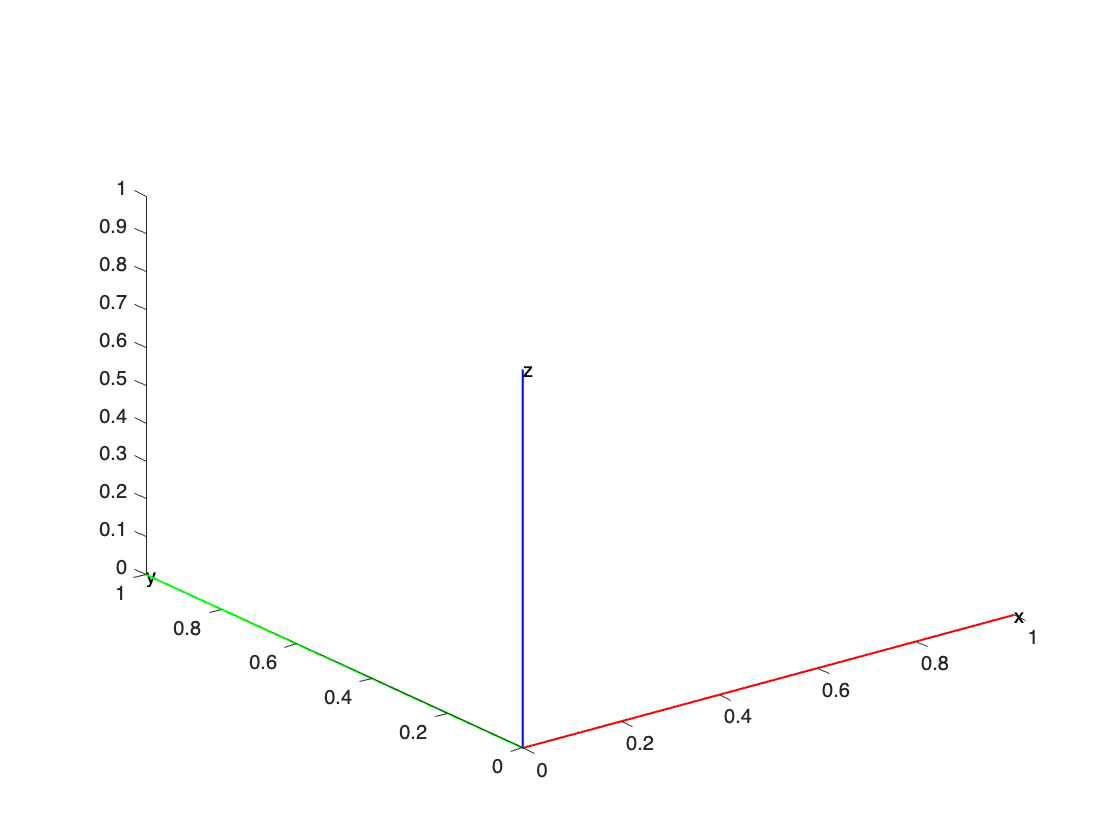

In [45]:
plot(r1);

<a name="H_C909BC72"></a>
#### Sequential rotations

Sequential rotations are obtained by post-multiplication. For example, the transformation between the neutral reference frame by ${r_1 }$ followed by ${r_2 }$  is


$${\mathit{\mathbf{r}}}_3 ={\mathit{\mathbf{r}}}_1 {\mathit{\mathbf{r}}}_2$$

For example


In [46]:
clear all;
include_namespace_dq
disp('Displaying the result of the sequential multiplication r3=r1*r2')

Displaying the result of the sequential multiplication r3=r1*r2


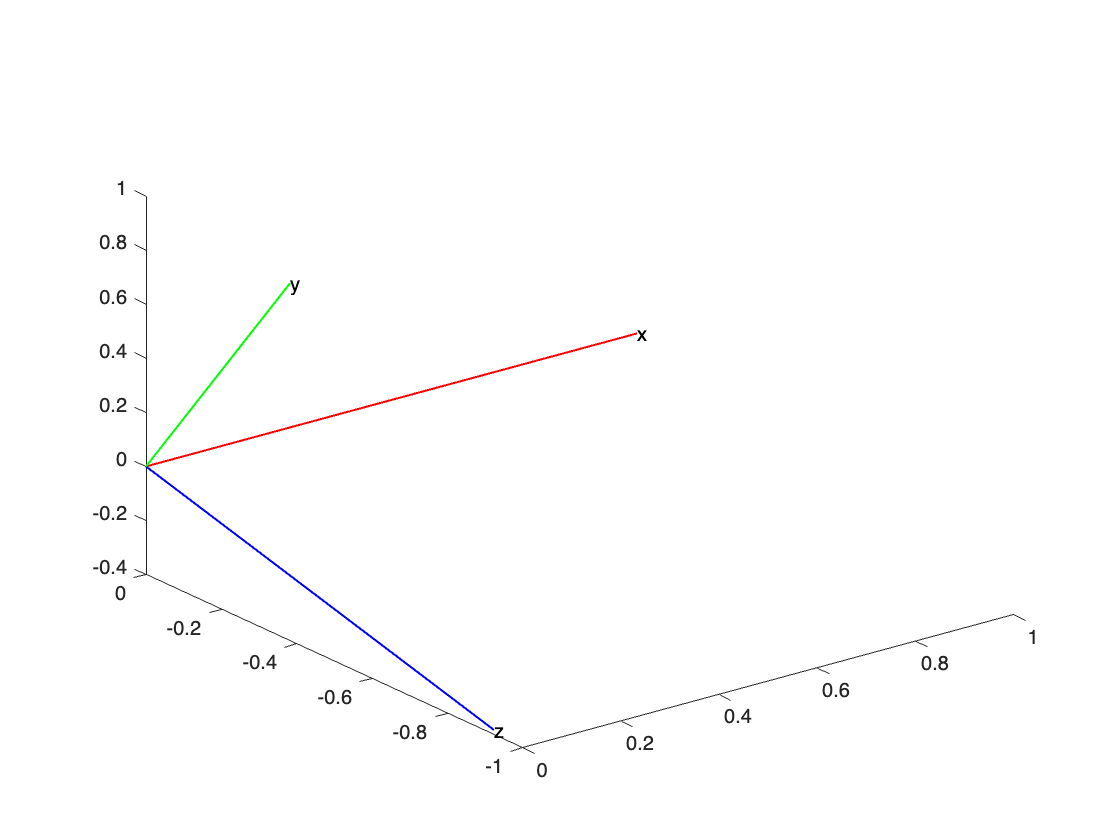

In [47]:
r1 = cos(pi/16) + i_*sin(pi/16);
r2 = cos(pi/4) + i_*sin(pi/4);
r3 = r1*r2;
plot(r3);


We can also plot all intermediary rotations using subplot.


In [48]:
clear all;
include_namespace_dq
disp('Displaying the result of the sequential multiplication using subplot')

Displaying the result of the sequential multiplication using subplot


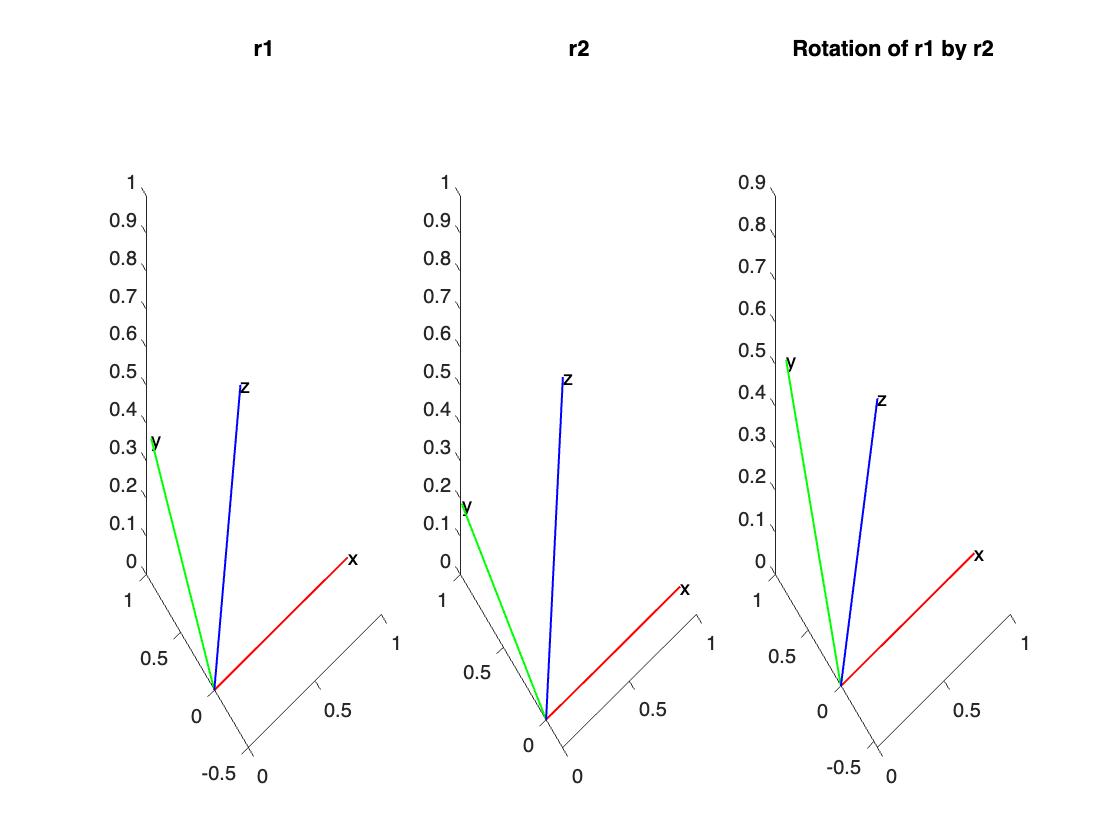

In [49]:
r1 = cos(pi/16) + i_*sin(pi/16);
r2 = cos(pi/32) + i_*sin(pi/32);
r3 = r1*r2;

subplot(1,3,1);
plot(r1);
title('r1');
subplot(1,3,2);
plot(r2);
title('r2');
subplot(1,3,3);
plot(r3);
title('Rotation of r1 by r2');

<a name="H_625A2B4B"></a>
#### Reverse rotation

The reverse rotation can be obtained using the conjugate operation, because unit quaternions have unit norm. Hence,


$$\mathit{\mathbf{r}}{\left(\mathit{\mathbf{r}}\right)}^* =1$$

For example, for a given rotation quaternion


In [50]:
r1 = cos(pi/16) + i_*sin(pi/16);


The rotation quaternion that corresponds to the reverse rotation is given by its conjugate.


In [51]:
conj(r1)

ans = 
         0.98079 - 0.19509i


We can verify that sequentially multiplying one by the other gives us a "no rotation" quaternion.


In [52]:
r1*conj(r1)

ans = 
         1

<a name="T_98D69E51"></a>
# <span style="color:rgb(213,80,0)">Homework</span>

Note: Dont forget to add


In [53]:
include_namespace_dq


in the beginning of your script.

1.  Create a MATLAB script called [quaternion_basics_homework.m]. On it, do the following tasks.
2. Store, in $r_1$ , the value of a rotation of $\phi =\frac{\pi \;\;}{8}\;\textrm{rad}$ about the x-axis.
3. Store, in $r_2$ , the value of a rotation of $\phi =\frac{\pi \;\;}{16}\;\textrm{rad}$ about the y-axis.
4. Store, in $r_3$ , the value of a rotation of $\phi =\frac{\pi \;\;}{32}\;\textrm{rad}$ about the z-axis.
5. Calculate the result of the sequential rotation of the neutral reference-frame by $r_1$ , followed by $r_2$ , followed by $r_3$ , and store it in ${\mathit{\mathbf{r}}}_4$ . Plot ${\mathit{\mathbf{r}}}_4$ .
6. Find the reverse rotation of ${\mathit{\mathbf{r}}}_4$ and store it in ${\mathit{\mathbf{r}}}_5$ .
7. Rotate ${\mathit{\mathbf{r}}}_5$ by ${360}^{\circ \;}$ about the x-axis and store it in ${\mathit{\mathbf{r}}}_6$ . Is ${\mathit{\mathbf{r}}}_5 =-{\mathit{\mathbf{r}}}_6$ ? Plot ${\mathit{\mathbf{r}}}_5$ and ${\mathit{\mathbf{r}}}_6$ to confirm that they represent the same rotation.
<a name="T_B6A9D8F3"></a>
# <span style="color:rgb(213,80,0)">Bonus Homework</span>
1.  What is the general form of the quaternion multiplication? Multiply ${\mathit{\mathbf{h}}}_1 =a_1 +b_1 \hat{\;\imath \;} +c_1 \hat{\;\jmath \;} +d_1 \hat{\;k}$ and ${\mathit{\mathbf{h}}}_2 =a_2 +b_2 \hat{\;\imath \;} +c_2 \hat{\;\jmath \;} +d_2 \hat{\;k}$ on pen and paper and find ${\mathit{\mathbf{h}}}_3 =a_3 +b_3 \hat{\;\imath \;} +c_3 \hat{\;\jmath \;} +d_3 \hat{\;k}$ .
2. What is the general form of the quaternion norm? Simplify $\sqrt{\;{\mathit{\mathbf{h}}}_1 {\mathit{\mathbf{h}}}_1^* }$ on pen and paper.
3. Show that every unit quaternion, written as $\mathit{\mathbf{r}}=\cos \left(\frac{\phi }{2}\right)+\textrm{vsin}\left(\frac{\;\phi \;}{2}\right)$ , has unit norm. Do that on pen and paper.
